# Análise Airbnb Boston

<p> Um investidor pessoal contratou seus serviços. Ele está planejando comprar 10 casas de férias para investimento. Com base no desempenho das casas que você analisou, esse é um bom investimento? </p>
<p> Qual o melhor tipo de casa para investir?</p>
<p> O que acontece se o aluguel cair em média 20% </p>

## Análise inicial

### Dataset listings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configurar pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Configurar pandas para exibir todo o conteúdo das colunas
pd.reset_option('max_colwidth')


In [3]:
listings = pd.read_csv('csvs_originais/listings.csv')
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [4]:
colunas_para_remover = ['scrape_id','last_scraped','thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url','host_picture_url','country_code','country','calendar_last_scraped']

listings = listings.drop(columns=colunas_para_remover)

In [5]:
listings.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [6]:
listings.shape

(3585, 84)

<i>Validando se algumas tabelas que não foram removidas de fato não possuem valores que são interessantes para a análise </i>

In [7]:
# jurisdiction_names, license, neighbourhood_group_cleansed

listings['jurisdiction_names'].isnull().sum()

3585

In [8]:
listings['license'].isnull().sum()

3585

In [9]:
listings['neighbourhood_group_cleansed'].isnull().sum()

3585

In [10]:
listings['square_feet'].isnull().sum()
#considerando do total de 3585 registros, 3529 possuem valores nulos no campo square_feet,
#essa coluna não é confiável para uma análise significativa, por isso, irei removê-la também do meu dataframe

3529

In [11]:
listings['has_availability'].isnull().sum()

3585

In [12]:
colunas_para_remover = ['jurisdiction_names','license','neighbourhood_group_cleansed', 'square_feet','has_availability']

listings = listings.drop(columns=colunas_para_remover)

In [13]:
listings.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",16701,https://www.airbnb.com/users/show/16701,Phil,2009-05

In [14]:
#contando a quantidade de valores none para a coluna experiences_offered
(listings['experiences_offered'] == 'none').sum()

3585

In [15]:
(listings['requires_license'] == 'f').sum()

3585

In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   name                              3585 non-null   object 
 3   summary                           3442 non-null   object 
 4   space                             2528 non-null   object 
 5   description                       3585 non-null   object 
 6   experiences_offered               3585 non-null   object 
 7   neighborhood_overview             2170 non-null   object 
 8   notes                             1610 non-null   object 
 9   transit                           2295 non-null   object 
 10  access                            2096 non-null   object 
 11  interaction                       2031 non-null   object 
 12  house_

Removendo mais alguns campos que não são necessários para nossa análise

In [17]:
listings = listings.drop(columns=['experiences_offered', 'market', 'smart_location', 'calendar_updated', 'requires_license','host_location', 'host_about', 'host_neighbourhood', 'host_total_listings_count','calculated_host_listings_count'])

In [18]:
listings.head(2)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,NaN,NaN,NaN,f,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,within an hour,100%,100%,f,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1.3


In [19]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   name                              3585 non-null   object 
 3   summary                           3442 non-null   object 
 4   space                             2528 non-null   object 
 5   description                       3585 non-null   object 
 6   neighborhood_overview             2170 non-null   object 
 7   notes                             1610 non-null   object 
 8   transit                           2295 non-null   object 
 9   access                            2096 non-null   object 
 10  interaction                       2031 non-null   object 
 11  house_rules                       2393 non-null   object 
 12  host_i

Converter tipos de dados para o correto

In [20]:
#Convertendo as datas que estão como object para datetime
listings[['host_since', 'first_review', 'last_review']] = listings[['host_since','first_review','last_review']].apply(pd.to_datetime)

In [21]:
#Converter os valores monetários para float64 price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people
listings[['price', 'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee','extra_people']] = listings[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[\$,]', '', regex=True).astype(float)

In [22]:
#Converter os valores t e f para boolean host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, instant_bookable, require_guest_profile_picture, require_guest_phone_verification
listings[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']] = listings[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']].replace({'t': True, 'f': False}).astype(bool)

/var/folders/_5/jv6f9k4n2xq59l09xtzj00fc0000gn/T/ipykernel_32812/562114937.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  listings[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']] = listings[['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']].replace({'t': True, 'f': False}).astype(bool)


In [23]:
# Função para remover '%' e converter para float
def percent_to_float(value):
    if isinstance(value, str):  # Verifica se o valor é uma string
        return float(value.rstrip('%')) / 100.0
    return value  # Retorna o valor original se não for uma string

# Aplicar a função na coluna 'host_response_rate' e 'host_acceptance_rate'
listings[['host_response_rate', 'host_acceptance_rate']] = listings[['host_response_rate', 'host_acceptance_rate']].apply(lambda x: x.apply(percent_to_float))

In [24]:
listings[['host_response_rate', 'host_acceptance_rate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3114 non-null   float64
 1   host_acceptance_rate  3114 non-null   float64
dtypes: float64(2)
memory usage: 56.1 KB


In [25]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3585 non-null   int64         
 1   listing_url                       3585 non-null   object        
 2   name                              3585 non-null   object        
 3   summary                           3442 non-null   object        
 4   space                             2528 non-null   object        
 5   description                       3585 non-null   object        
 6   neighborhood_overview             2170 non-null   object        
 7   notes                             1610 non-null   object        
 8   transit                           2295 non-null   object        
 9   access                            2096 non-null   object        
 10  interaction                       2031 non-null 

In [26]:
listings.head(2) 

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,NaN,NaN,NaN,False,1,"['email', 'phone', 'facebook', 'reviews']",True,False,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.282619,-71.133068,True,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,moderate,False,False,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,within an hour,1.0,1.0,False,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",True,True,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.286241,-71.134374,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,True,moderate,False,False,1.3


In [27]:
(listings['bathrooms'] % 1 != 0).sum()

311

In [28]:
(listings['bedrooms'] % 1 != 0).sum()

10

In [29]:
(listings['beds'] % 1 != 0).sum()

9

Considerando que temos bathrooms, bedrooms e beds com valores quebrados e temos uma quantidade considerada de propriedades com essas informações, vou removê-los da minha análise, pois não faz sentido manter valor quebrado para nossa análise

In [30]:
listings = listings[(listings['bathrooms'] % 1 == 0) & (listings['bedrooms'] % 1 == 0) & (listings['beds'] % 1 == 0)]
listings[['bathrooms','bedrooms','beds']] = listings[['bathrooms','bedrooms','beds']].astype(int)

In [31]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3260 entries, 1 to 3584
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3260 non-null   int64         
 1   listing_url                       3260 non-null   object        
 2   name                              3260 non-null   object        
 3   summary                           3149 non-null   object        
 4   space                             2292 non-null   object        
 5   description                       3260 non-null   object        
 6   neighborhood_overview             1985 non-null   object        
 7   notes                             1461 non-null   object        
 8   transit                           2099 non-null   object        
 9   access                            1902 non-null   object        
 10  interaction                       1850 non-null   obj

In [32]:
listings.shape

(3260, 69)

In [33]:
listings.head(2)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,within an hour,1.0,1.00,False,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",True,True,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.286241,-71.134374,True,Apartment,Private room,2,1,1,1,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,True,moderate,False,False,1.30
2,6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",16701,https://www.airbnb.com/users/show/16701,Phil,2009-05-11,within a few hours,1.0,0.88,True,1,"['email', 'phone', 'reviews', 'jumio']",True,True,"Ardale St., Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.292438,-71.135765,True,Apartment,Private room,2,1,1,1,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,False,moderate,True,False,0.47


Descobrindo quais os tipos de propriedades

In [34]:
listings['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV', 'Villa'], dtype=object)

Excluir as propriedades que não é de nosso interesse para a análise

In [35]:
valores_para_deletar = ['Villa', 'Bed & Breakfast', 'Guesthouse', 'Boat', 'Dorm', 'Other', 'Camper/RV']
listings = listings.query('property_type not in @valores_para_deletar')

In [36]:
listings['property_type'].count()

3187

In [37]:
listings['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Entire Floor',
       'Loft', nan], dtype=object)

In [38]:
listings[listings['property_type'].isnull()]

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1321,7731797,https://www.airbnb.com/rooms/7731797,Classy Studio in Historic Back Bay,This polished studio in the heart of Boston’s ...,When you walk through the front door of this F...,This polished studio in the heart of Boston’s ...,Right downstairs you’ll find Newbury Street bu...,• Please be aware that this is a 4th floor wal...,Parking can be difficult in this area. If you’...,NaN,Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,12243051,https://www.airbnb.com/users/show/12243051,Flatbook,2014-02-14,within a few hours,0.71,0.98,False,363,"['email', 'phone', 'reviews', 'manual_offline'...",True,True,"Newbury Street, Boston, MA 02116, United States",Back Bay,Back Bay,Boston,MA,02116,42.349350,-71.082488,True,NaN,Entire home/apt,2,1,0,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",199.0,NaN,NaN,300.0,75.0,2,10.0,3,1125,16,32,59,105,26,2015-09-13,2016-08-21,85.0,9.0,9.0,9.0,9.0,10.0,9.0,True,strict,False,False,2.16
2061,14122467,https://www.airbnb.com/rooms/14122467,Hotel room in Downtown Boston - amazing location!,This is a room in a 4-star hotel located in Do...,NaN,This is a room in a 4-star hotel located in Do...,NaN,NaN,NaN,NaN,NaN,- Handicap Accessible - Additional information...,32088178,https://www.airbnb.com/users/show/32088178,Christine,2015-04-27,NaN,NaN,NaN,False,1,"['email', 'phone', 'reviews', 'jumio']",True,True,"Devonshire Street, Boston, MA 02110, United St...",Downtown Crossing,Downtown,Boston,MA,02110,42.355444,-71.057985,True,NaN,Entire home/apt,2,1,1,1,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",""Wh...",190.0,NaN,NaN,NaN,NaN,1,0.0,2,3,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,strict,False,False,NaN
3393,10758,https://www.airbnb.com/rooms/10758,Budget Single - share bath,Our least expensive room - this room has one s...,THE FARRINGTON -The Boston Hotel Alternative ...,Our least expensive room - this room has one s...,We are in the student section of Boston - draw...,NaN,Transportation is EXCELLENT !! We're right off...,"The guest will have access to our building, co...",We have someone here to assist you just a phon...,Please note that we are a no smoking environme...,38440,https://www.airbnb.com/users/show/38440,The Farrington Inn,2009-09-14,within a day,1.00,0.42,False,4,"['email', 'phone', 'reviews']",True,False,"Farrington Ave, Boston, MA 02134, United States",Allston-Brighton,Allston,Boston,MA,02134,42.353449,-71.131797,True,NaN,Private room,1,1,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",115.0,NaN,NaN,NaN,NaN,1,0.0,1,90,3,13,43,43,2,2014-10-22,2015-10-03,60.0,6.0,5.0,8.0,8.0,8.0,7.0,False,moderate,False,False,0.09


Analisando os valores de property_type null decidi deletá-los

In [39]:
listings = listings.dropna(subset=['property_type'])

In [40]:
listings.shape

(3187, 69)

In [41]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3187 entries, 1 to 3584
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3187 non-null   int64         
 1   listing_url                       3187 non-null   object        
 2   name                              3187 non-null   object        
 3   summary                           3081 non-null   object        
 4   space                             2232 non-null   object        
 5   description                       3187 non-null   object        
 6   neighborhood_overview             1936 non-null   object        
 7   notes                             1425 non-null   object        
 8   transit                           2048 non-null   object        
 9   access                            1855 non-null   object        
 10  interaction                       1801 non-null   obj

In [42]:
listings.describe().round(2)

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3187.00,3187.00,3187,2771.00,2771.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,782.00,791.00,1182.00,2219.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,2506,2506,2457.00,2447.00,2452.00,2450.00,2452.00,2448.00,2449.00,2506.00
mean,8584401.15,25271740.62,2014-04-16 06:05:04.989017856,0.95,0.84,61.61,42.34,-71.08,2.99,1.16,1.22,1.57,171.53,888.23,3595.08,318.10,67.82,1.42,10.72,3.05,32212.11,8.50,21.48,38.08,175.34,18.70,2015-07-13 02:15:02.154828288,2016-06-13 13:14:07.565841920,91.91,9.44,9.26,9.65,9.65,9.44,9.17,2.02
min,3353.00,4240.00,2008-11-11 00:00:00,0.00,0.00,0.00,42.24,-71.17,1.00,0.00,0.00,0.00,10.00,80.00,500.00,95.00,5.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2009-03-21 00:00:00,2010-10-16 00:00:00,20.00,2.00,2.00,2.00,4.00,2.00,2.00,0.01
25%,4977750.50,6608084.00,2013-05-27 00:00:00,0.97,0.72,1.00,42.33,-71.10,2.00,1.00,1.00,1.00,89.00,475.00,1615.00,100.00,28.00,1.00,0.00,1.00,365.00,0.00,0.00,0.00,17.00,1.00,2015-02-23 00:00:00,2016-06-19 00:00:00,89.00,9.00,9.00,9.00,9.00,9.00,9.00,0.49
50%,8761060.00,19806255.00,2014-08-14 00:00:00,1.00,0.94,2.00,42.35,-71.08,2.00,1.00,1.00,1.00,150.00,745.00,2900.00,250.00,50.00,1.00,0.00,2.00,1125.00,4.00,15.00,36.00,174.00,5.00,2015-10-16 12:00:00,2016-08-14 00:00:00,94.00,10.00,10.00,10.00,10.00,10.00,9.00,1.25
75%,12819845.00,36607627.00,2015-06-26 12:00:00,1.00,1.00,7.00,42.35,-71.06,4.00,1.00,1.00,2.00,216.00,1150.00,5000.00,400.00,100.00,2.00,20.00,3.00,1125.00,15.00,40.00,68.00,322.00,20.00,2016-05-22 00:00:00,2016-08-28 00:00:00,98.00,10.00,10.00,10.00,10.00,10.00,10.00,2.81
max,14933461.00,93854106.00,2016-09-06 00:00:00,1.00,1.00,749.00,42.39,-71.00,16.00,5.00,5.00,16.00,4000.00,5000.00,14000.00,4500.00,300.00,14.00,200.00,200.00,99999999.00,30.00,60.00,90.00,365.00,404.00,2016-09-06 00:00:00,2016-09-06 00:00:00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,19.15
std,4418734.91,22819204.17,NaN,0.13,0.21,175.66,0.02,0.03,1.67,0.40,0.72,0.95,145.66,597.52,2529.04,331.54,49.98,1.03,19.11,6.01,1771353.97,10.39,21.81,33.12,141.54,35.09,NaN,NaN,9.40,0.92,1.15,0.76,0.74,0.89,1.01,2.16


In [43]:
listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Vamos deletar os registros que são Private room e Shared room porque não nos interessa para a nossa análise, visto que o nosso foco é casa/apartamento inteiro

In [44]:
valores_para_deletar = ['Private room', 'Shared room']
listings = listings.query('room_type not in @valores_para_deletar')

In [45]:
listings.shape

(1957, 69)

In [46]:
listings.corr(numeric_only = True).round(4)

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,1.0000,0.5169,-0.0415,0.1203,-0.1021,-0.0206,-0.0305,-0.1185,0.0668,0.0390,-0.1983,0.0351,0.0294,-0.0169,0.0097,-0.0201,-0.0164,0.0895,-0.1350,-0.2160,-0.0537,-0.0336,-0.0984,-0.0272,-0.0360,-0.0200,-0.0352,-0.2085,-0.4015,0.0445,0.0559,0.0592,0.0320,0.0437,0.0063,0.0862,0.1513,-0.1645,-0.3325,0.2489
host_id,0.5169,1.0000,0.0391,0.1122,-0.0556,-0.0814,-0.0944,-0.2946,0.0118,-0.0140,-0.1557,-0.0398,-0.0378,-0.0562,-0.0342,0.0333,-0.0190,0.0626,-0.0658,-0.1943,-0.0399,-0.0245,-0.0706,-0.0207,-0.0330,-0.0286,-0.0335,-0.1440,-0.2084,0.0645,0.0634,0.0530,0.0710,0.0672,0.0376,0.0810,0.0730,-0.1193,-0.2619,0.1983
host_response_rate,-0.0415,0.0391,1.0000,0.0018,0.1203,-0.0659,-0.0143,0.0546,0.0348,0.0662,0.0151,0.0171,-0.0155,-0.0242,0.0201,0.0203,0.0278,0.0339,-0.0624,-0.0053,0.0821,0.0792,-0.0302,0.0106,-0.0473,-0.0273,-0.0004,0.0731,0.1251,0.0356,0.0302,0.0142,0.0780,0.0754,0.0176,0.0185,-0.0766,0.0424,-0.0265,0.1364
host_acceptance_rate,0.1203,0.1122,0.0018,1.0000,0.1532,-0.4720,-0.0449,-0.1279,-0.0723,-0.0347,-0.0567,-0.0093,-0.1731,-0.0488,0.0528,-0.0944,-0.0229,-0.4094,-0.0118,-0.1446,0.1471,0.1044,-0.0260,0.0200,-0.4062,-0.3659,-0.3198,-0.1279,0.2223,0.0560,0.1120,0.0298,0.0950,0.1326,-0.0346,0.1336,0.3423,0.0483,-0.2278,0.3697
host_is_superhost,-0.1021,-0.0556,0.1203,0.1532,1.0000,-0.1411,0.0195,0.0730,-0.0223,0.0054,0.0296,0.0734,0.0066,0.0618,0.0613,0.0407,0.0245,-0.0845,0.0330,-0.0289,0.1423,0.1203,-0.0323,-0.0074,-0.1042,-0.0919,-0.0507,0.0757,0.2291,0.1973,0.1985,0.1882,0.1454,0.1506,0.0823,0.1934,0.0935,0.0605,-0.0250,0.2099
host_listings_count,-0.0206,-0.0814,-0.0659,-0.4720,-0.1411,1.0000,0.0267,0.2549,0.0850,-0.0057,0.1479,0.0701,0.2919,0.1085,-0.0398,0.0849,0.2680,0.6497,0.0248,0.2649,-0.1909,-0.2105,0.0966,-0.0088,0.6093,0.5544,0.4971,0.0712,-0.1841,-0.1859,-0.2377,-0.0726,-0.2779,-0.2987,-0.0685,-0.2692,-0.0504,-0.0540,0.3184,-0.2515
host_has_profile_pic,-0.0305,-0.0944,-0.0143,-0.0449,0.0195,0.0267,1.0000,0.0822,-0.0039,-0.0180,-0.0215,0.0193,0.0084,0.0145,0.0064,0.0244,-0.0370,-0.0098,-0.0288,0.0251,0.0166,-0.0557,-0.0043,0.0014,0.0019,0.0015,0.0143,0.0294,0.0150,-0.0431,-0.0275,-0.0398,-0.0032,-0.0022,-0.0212,-0.0435,-0.0223,-0.0635,-0.0141,0.0027
host_identity_verified,-0.1185,-0.2946,0.0546,-0.1279,0.0730,0.2549,0.0822,1.0000,-0.0068,0.0096,0.0425,0.0652,0.0716,0.0560,0.0260,-0.0096,-0.0802,0.2186,0.0181,0.1194,0.0371,-0.0117,0.0178,0.0133,0.1624,0.1685,0.1788,0.0882,0.0891,0.0346,0.0373,0.0365,-0.0110,-0.0098,-0.0528,-0.0195,0.0545,0.0432,0.1381,0.0037
latitude,0.0668,0.0118,0.0348,-0.0723,-0.0223,0.0850,-0.0039,-0.0068,1.0000,0.3962,0.0177,-0.1328,0.0221,-0.1583,-0.1419,0.0817,0.0917,0.1317,0.0227,0.0584,-0.1264,-0.0456,0.0632,0.0240,0.0365,0.0376,0.0341,-0.0048,0.0218,-0.0022,-0.0443,-0.0141,-0.0421,-0.0345,0.1809,-0.0128,0.0565,-0.0391,0.0158,0.0717
longitude,0.0390,-0.0140,0.0662,-0.0347,0.0054,-0.0057,-0.0180,0.0096,0.3962,1.0000,-0.0307,-0.0306,0.0533,-0.0257,-0.0483,0.0982,0.1429,0.0396,-0.0390,0.0430,-0.0325,0.0042,0.0124,0.0196,-0.0110,0.0095,0.0205,0.0186,0.0524,0.0565,-0.0065,0.0504,0.0387,0.0352,0.0340,0.0282,-0.0042,-0.0136,0.0040,0.1048


In [47]:
# Criar uma tabela de referência com zipcodes e neighbourhoods fictícios
zipcode_to_neighbourhood = {
    'zipcode': ['02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02134', '02135', '02136', '02138', '02139', '02140', '02141', '02142', '02143', '02144', '02145'],
    'neighbourhood': ['Beacon Hill', 'North End', 'Waterfront', 'Chinatown', 'North End', 'West End', 'Fenway', 'Back Bay', 'South End', 'Roxbury', 'Mission Hill', 'Dorchester', 'Dorchester', 'Dorchester', 'Dorchester', 'Mattapan', 'South Boston', 'East Boston', 'Charlestown', 'Jamaica Plain', 'Roslindale', 'West Roxbury', 'Allston', 'Brighton', 'Hyde Park', 'Cambridge', 'Cambridge', 'Cambridge', 'Cambridge', 'Cambridge', 'Somerville', 'Somerville', 'Somerville']
}

# Converter para DataFrame
reference_data = pd.DataFrame(zipcode_to_neighbourhood) 

# Exibir a tabela de referência
print(reference_data)

   zipcode  neighbourhood
0    02108    Beacon Hill
1    02109      North End
2    02110     Waterfront
3    02111      Chinatown
4    02113      North End
5    02114       West End
6    02115         Fenway
7    02116       Back Bay
8    02118      South End
9    02119        Roxbury
10   02120   Mission Hill
11   02121     Dorchester
12   02122     Dorchester
13   02124     Dorchester
14   02125     Dorchester
15   02126       Mattapan
16   02127   South Boston
17   02128    East Boston
18   02129    Charlestown
19   02130  Jamaica Plain
20   02131     Roslindale
21   02132   West Roxbury
22   02134        Allston
23   02135       Brighton
24   02136      Hyde Park
25   02138      Cambridge
26   02139      Cambridge
27   02140      Cambridge
28   02141      Cambridge
29   02142      Cambridge
30   02143     Somerville
31   02144     Somerville
32   02145     Somerville


In [48]:
# Supondo que seu DataFrame se chame listings
# Criar um dicionário de mapeamento do zipcode para o neighbourhood
zipcode_to_neighbourhood = listings.dropna(subset=['neighbourhood']).groupby('zipcode')['neighbourhood'].first().to_dict()

# Preencher valores ausentes em 'neighbourhood' usando o mapeamento
listings['neighbourhood_updated'] = listings['neighbourhood'].fillna(listings['zipcode'].map(zipcode_to_neighbourhood))

# Verificar o DataFrame resultante
print(listings[['zipcode','neighbourhood','neighbourhood_cleansed','neighbourhood_updated']])

     zipcode   neighbourhood neighbourhood_cleansed neighbourhood_updated
6      02131             NaN             Roslindale            Roslindale
9      02131      Roslindale             Roslindale            Roslindale
12     02131      Roslindale             Roslindale            Roslindale
13     02131      Roslindale             Roslindale            Roslindale
21     02131      Roslindale             Roslindale            Roslindale
...      ...             ...                    ...                   ...
3565   02138             NaN                Allston             Cambridge
3567   02138  Harvard Square                Allston        Harvard Square
3569   02145             NaN            Charlestown            Somerville
3572   02138  Harvard Square                Allston        Harvard Square
3582   02141             NaN            Charlestown             Cambridge

[1957 rows x 4 columns]


In [49]:
print(listings[listings['neighbourhood'].isna()][['zipcode','neighbourhood','neighbourhood_cleansed','neighbourhood_updated']])

     zipcode neighbourhood neighbourhood_cleansed neighbourhood_updated
6      02131           NaN             Roslindale            Roslindale
23     02131           NaN             Roslindale            Roslindale
94       NaN           NaN          Jamaica Plain                   NaN
188    02130           NaN          Jamaica Plain         Jamaica Plain
216    02120           NaN          Jamaica Plain          Mission Hill
...      ...           ...                    ...                   ...
3539   02446           NaN  Longwood Medical Area        Fenway/Kenmore
3558   02139           NaN                Allston             Cambridge
3565   02138           NaN                Allston             Cambridge
3569   02145           NaN            Charlestown            Somerville
3582   02141           NaN            Charlestown             Cambridge

[250 rows x 4 columns]


In [50]:
# Criar um mapeamento dos valores de 'neighbourhood_updated' para 'neighbourhood_cleansed'
mapping = listings.dropna(subset=['neighbourhood_updated'])[['neighbourhood_cleansed', 'neighbourhood_updated']].drop_duplicates()
mapping_dict = mapping.set_index('neighbourhood_cleansed')['neighbourhood_updated'].to_dict()

# Preencher 'neighbourhood_updated' onde ela é NaN e 'zipcode' e 'neighbourhood' são NaN, usando o mapeamento criado
listings.loc[listings['neighbourhood_updated'].isna() & listings['zipcode'].isna(), 'neighbourhood_updated'] = listings.loc[listings['neighbourhood_updated'].isna() & listings['zipcode'].isna(), 'neighbourhood_cleansed'].map(mapping_dict)

# Exibir o DataFrame atualizado
listings[listings['neighbourhood'].isna() & listings['zipcode'].isna()][['zipcode','neighbourhood','neighbourhood_cleansed','neighbourhood_updated']]

,zipcode,neighbourhood,neighbourhood_cleansed,neighbourhood_updated
94,NaN,NaN,Jamaica Plain,Roslindale
1385,NaN,NaN,Back Bay,Roxbury
1473,NaN,NaN,Back Bay,Roxbury
1631,NaN,NaN,East Boston,East Boston
1662,NaN,NaN,East Boston,East Boston
2151,NaN,NaN,Downtown,Financial District
2298,NaN,NaN,Fenway,Mission Hill
2550,NaN,NaN,Brighton,Allston-Brighton
2932,NaN,NaN,Dorchester,Mattapan
3058,NaN,NaN,South Boston Waterfront,South Boston


In [51]:
listings

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood_updated
6,5706985,https://www.airbnb.com/rooms/5706985,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,Roslindale is the new hip area of Boston. Clos...,"Information about the house, wifi pasword and ...",The commuter rail (Needham Line) is a 5 minute...,I have an electronic keypad so arrival time ca...,I can interact or not- that is up to you. This...,Please no shoes in the house so bring slippers...,6570877,https://www.airbnb.com/users/show/6570877,Juliet,2013-05-25,within an hour,0.98,0.96,False,5,"['email', 'phone', 'reviews', 'jumio', 'kba']",True,True,"Kittredge Street, Boston, MA 02131, United States",NaN,Roslindale,Boston,MA,02131,42.281390,-71.131190,False,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",100.0,NaN,NaN,NaN,NaN,1,25.0,1,1125,22,39,69,344,57,2015-07-08,2016-09-01,90.0,10.0,10.0,10.0,10.0,9.0,9.0,False,strict,False,False,4.00,Roslindale
9,849408,https://www.airbnb.com/rooms/849408,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,"This neighborhood truly has it all. Good, not...",Please note that this is a second floor apartm...,Plenty of on street parking with no restrictio...,NaN,I'm available for questions anytime before or ...,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,4434391,https://www.airbnb.com/users/show/4434391,Damon,2012-12-18,within an hour,1.00,1.00,True,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.288820,-71.139510,True,Apartment,Entire home/apt,5,1,2,2,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",229.0,NaN,NaN,200.0,50.0,4,25.0,4,10,20,50,80,107,33,2014-01-02,2016-05-27,94.0,10.0,9.0,10.0,10.0,9.0,9.0,False,strict,False,False,1.01,Roslindale
12,2684840,https://www.airbnb.com/rooms/2684840,"Updated, spacious living in Rozzie","Clean, sunny 2 bedroom in amazing Roslindale V...",NaN,"Clean, sunny 2 bedroom in amazing Roslindale V...",NaN,NaN,NaN,NaN,NaN,- One of the bedroom closets is not accessible...,13743098,https://www.airbnb.com/users/show/13743098,Megan,2014-03-31,within a few hours,1.00,1.00,False,2,"['email', 'phone', 'reviews']",True,False,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,42.291723,-71.131556,True,Condominium,Entire home/apt,4,1,2,2,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air Condition...",93.0,NaN,NaN,NaN,40.0,1,0.0,1,1125,0,0,0,0,1,2016-07-23,2016-07-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,flexible,False,False,0.64,Roslindale
13,13547301,https://www.airbnb.com/rooms/13547301,2 Bedroom Apartment in Boston,My place is close to Public Transportation. Th...,NaN,My place is 

In [52]:
(listings['price'] > 400).sum()

82

In [53]:
(listings['price']).count()

1957

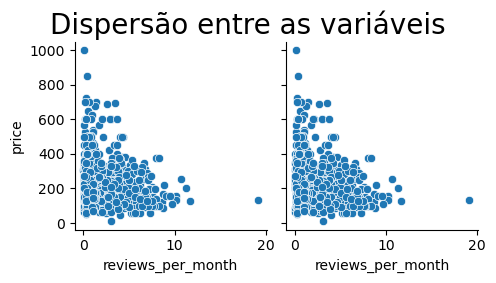

In [54]:
ax = sns.pairplot(listings, y_vars='price', x_vars=['reviews_per_month','reviews_per_month'])
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1.09)
ax

#### Vamos analisar a distribuição dos preços médios por tipo de propriedade e neighbourhood

In [55]:
# Calcular o preço médio por tipo de propriedade e bairro
average_price = listings.groupby(['property_type', 'neighbourhood_updated'])['price'].mean().reset_index()

# Transformar os dados em uma tabela usando pivot
table = pd.pivot_table(average_price, values='price', index='property_type', columns='neighbourhood_updated', aggfunc='mean')

# Mostrar a tabela
table

neighbourhood_updated,Allston-Brighton,Back Bay,Beacon Hill,Brookline,Cambridge,Charlestown,Chestnut Hill,Chinatown,Dorchester,Downtown,Downtown Crossing,East Boston,Fenway/Kenmore,Financial District,Government Center,Harvard Square,Hyde Park,Jamaica Plain,Leather District,Mattapan,Mission Hill,North End,Roslindale,Roxbury,Somerville,South Boston,South End,Theater District,West End,West Roxbury
property_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apartment,156.558824,245.069264,202.585366,350.0,223.833333,236.384615,104.5,239.558824,146.166667,242.5,272.714286,151.037037,252.176166,332.6,205.333333,289.0,205.0,191.933333,281.111111,179.0,196.984127,223.758065,141.333333,209.018868,216.0,280.122807,203.816754,234.958333,220.95,138.714286
Condominium,183.545455,246.875000,258.125000,NaN,NaN,235.545455,NaN,383.000000,177.800000,NaN,NaN,151.714286,350.800000,NaN,NaN,NaN,NaN,179.058824,288.000000,NaN,NaN,178.777778,93.000000,236.000000,NaN,237.913043,274.950000,NaN,NaN,NaN
Entire Floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House,190.181818,337.000000,327.250000,NaN,240.000000,364.777778,NaN,NaN,154.125000,NaN,NaN,177.333333,190.000000,NaN,NaN,NaN,NaN,211.461538,NaN,129.0,NaN,205.000000,152.142857,255.000000,NaN,290.454545,220.000000,NaN,NaN,201.333333
Loft,162.500000,150.250000,NaN,NaN,NaN,NaN,NaN,236.750000,250.000000,NaN,449.000000,NaN,NaN,NaN,NaN,NaN,85.0,220.000000,312.500000,NaN,166.666667,213.333333,NaN,NaN,NaN,214.666667,100.000000,389.500000,NaN,NaN
Townhouse,NaN,174.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.000000,156.250000,NaN,NaN,NaN


Para a análise acima, vamos utilizar o tableau

In [56]:
listings.shape

(1957, 70)

### Agora vamos olhar o dataset review

In [57]:
reviews = pd.read_csv('csvs_originais/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


Para nossa análise, não é interesse no momento o dataset reviews

### Vamos olhar o dataset calendar

In [58]:
calendar = pd.read_csv('csvs_originais/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [59]:
calendar.shape

(1308890, 4)

In [60]:
(calendar['available'] == 't').sum()

643037

In [61]:
calendar['price'].isnull().sum()

665853

In [62]:
#Converter o date para o tipo datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [63]:
calendar.describe()

,listing_id,date
count,1.308890e+06,1308890
mean,8.442118e+06,2017-03-07 00:00:00.000000256
min,3.353000e+03,2016-09-06 00:00:00
25%,4.679319e+06,2016-12-06 00:00:00
50%,8.578710e+06,2017-03-07 00:00:00
75%,1.279603e+07,2017-06-06 00:00:00
max,1.493346e+07,2017-09-05 00:00:00
std,4.500149e+06,NaN


In [64]:
print(calendar['available'].head(10))
print(calendar['available'].value_counts())

0    f
1    f
2    f
3    f
4    f
5    f
6    f
7    f
8    f
9    f
Name: available, dtype: object
available
f    665853
t    643037
Name: count, dtype: int64


In [65]:
# Corrigir a conversão da coluna 'available'
calendar['available'] = calendar['available'].replace({'t': True, 'f': False})

/var/folders/_5/jv6f9k4n2xq59l09xtzj00fc0000gn/T/ipykernel_32812/923267366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calendar['available'] = calendar['available'].replace({'t': True, 'f': False})


In [66]:
# Verificar a conversão da coluna 'available'
print(calendar['available'].head(10))
print(calendar['available'].value_counts())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: available, dtype: bool
available
False    665853
True     643037
Name: count, dtype: int64


In [67]:
duplicated_entries = calendar[calendar.duplicated(['listing_id', 'date'])]
print(f"Número de entradas duplicadas: {len(duplicated_entries)}")

Número de entradas duplicadas: 365


In [68]:
# Remover duplicatas
calendar = calendar.drop_duplicates(['listing_id', 'date'])

In [69]:
duplicated_entries = calendar[calendar.duplicated(['listing_id', 'date'])]
print(f"Número de entradas duplicadas: {len(duplicated_entries)}")

Número de entradas duplicadas: 0


Calcular a taxa de ocupação em 1 ano

In [70]:
# Calcular a taxa de ocupação
# Calcular o número de dias não disponíveis para cada listing_id
occupancy = calendar.groupby('listing_id')['available'].apply(lambda x: (~x).sum()).reset_index()
occupancy.columns = ['listing_id', 'days_booked']
occupancy.head()

,listing_id,days_booked
0,3353,116
1,5506,21
2,6695,41
3,6976,46
4,8792,117


Calcular a taxa de ocupação anual

In [71]:
# Calcular a taxa de ocupação
total_days = 365  # Considerando um ano
occupancy['annual_occupancy_rate'] = (occupancy['days_booked'] / total_days)

In [72]:
occupancy['annual_occupancy_rate'].describe()

count    3585.000000
mean        0.508640
std         0.389414
min         0.000000
25%         0.109589
50%         0.509589
75%         0.947945
max         1.000000
Name: annual_occupancy_rate, dtype: float64

In [73]:
# Juntar a taxa de ocupação com a tabela de listagens
listings = listings.merge(occupancy, left_on='id', right_on='listing_id', how='left')

# Substituir valores NaN por 0 (caso algumas listagens não tenham dados de ocupação)
listings['annual_occupancy_rate'].fillna(0, inplace=True)

/var/folders/_5/jv6f9k4n2xq59l09xtzj00fc0000gn/T/ipykernel_32812/1820484344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['annual_occupancy_rate'].fillna(0, inplace=True)


In [74]:
print(listings[['id', 'property_type', 'room_type', 'price', 'annual_occupancy_rate']])

            id property_type        room_type  price  annual_occupancy_rate
0      5706985     Apartment  Entire home/apt  100.0               0.057534
1       849408     Apartment  Entire home/apt  229.0               0.706849
2      2684840   Condominium  Entire home/apt   93.0               1.000000
3     13547301     Apartment  Entire home/apt  150.0               0.646575
4     13251243         House  Entire home/apt  120.0               0.432877
...        ...           ...              ...    ...                    ...
1952  14335003     Apartment  Entire home/apt  146.0               1.000000
1953  14472678     Apartment  Entire home/apt  259.0               1.000000
1954  14426586     Apartment  Entire home/apt  200.0               0.002740
1955  14744740     Apartment  Entire home/apt  459.0               0.764384
1956  14585486     Apartment  Entire home/apt  198.0               0.890411

[1957 rows x 5 columns]


In [75]:
listings['annual_occupancy_rate'].describe()

count    1957.000000
mean        0.522484
std         0.376969
min         0.000000
25%         0.136986
50%         0.520548
75%         0.942466
max         1.000000
Name: annual_occupancy_rate, dtype: float64

In [76]:
#Remover a coluna listing_id que está duplicada
listings.drop(columns=['listing_id','state'], inplace=True)

In [77]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308525 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308525 non-null  int64         
 1   date        1308525 non-null  datetime64[ns]
 2   available   1308525 non-null  bool          
 3   price       642957 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 41.2+ MB


Calcular a frequência de reservas por mês

In [78]:
# Remover o símbolo de dólar e converter a coluna de preço para float
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [79]:
# Adicionar uma coluna de ano e mês
calendar['year_month'] = calendar['date'].dt.to_period('M')

# Calcular o número de dias reservados (não disponíveis) e o número total de dias por mês para cada listing_id
monthly_occupancy = calendar.groupby(['listing_id', 'year_month']).agg(
    days_booked=('available', lambda x: (~x).sum()),
    total_days=('available', 'count'),
    avg_price_property_available=('price', 'mean')
).reset_index()

# Calcular a taxa de ocupação
monthly_occupancy['occupancy_rate'] = monthly_occupancy['days_booked'] / monthly_occupancy['total_days']

# Criar a coluna com o nome do mês
monthly_occupancy['month_name'] = monthly_occupancy['year_month'].dt.strftime('%B')

monthly_occupancy

,listing_id,year_month,days_booked,total_days,avg_price_property_available,occupancy_rate,month_name
0,3353,2016-09,25,25,NaN,1.000000,September
1,3353,2016-10,31,31,NaN,1.000000,October
2,3353,2016-11,30,30,NaN,1.000000,November
3,3353,2016-12,30,31,32.000000,0.967742,December
4,3353,2017-01,0,31,32.612903,0.000000,January
...,...,...,...,...,...,...,...
46600,14933461,2017-05,8,31,165.000000,0.258065,May
46601,14933461,2017-06,3,30,165.000000,0.100000,June
46602,14933461,2017-07,0,31,165.000000,0.000000,July
46603,14933461,2017-08,0,31,165.000000,0.000000,August


In [80]:
listings.head(2)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood_updated,days_booked,annual_occupancy_rate
0,5706985,https://www.airbnb.com/rooms/5706985,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,Roslindale is the new hip area of Boston. Clos...,"Information about the house, wifi pasword and ...",The commuter rail (Needham Line) is a 5 minute...,I have an electronic keypad so arrival time ca...,I can interact or not- that is up to you. This...,Please no shoes in the house so bring slippers...,6570877,https://www.airbnb.com/users/show/6570877,Juliet,2013-05-25,within an hour,0.98,0.96,False,5,"['email', 'phone', 'reviews', 'jumio', 'kba']",True,True,"Kittredge Street, Boston, MA 02131, United States",NaN,Roslindale,Boston,02131,42.28139,-71.13119,False,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",100.0,NaN,NaN,NaN,NaN,1,25.0,1,1125,22,39,69,344,57,2015-07-08,2016-09-01,90.0,10.0,10.0,10.0,10.0,9.0,9.0,False,strict,False,False,4.00,Roslindale,21,0.057534
1,849408,https://www.airbnb.com/rooms/849408,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,"This neighborhood truly has it all. Good, not...",Please note that this is a second floor apartm...,Plenty of on street parking with no restrictio...,NaN,I'm available for questions anytime before or ...,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,4434391,https://www.airbnb.com/users/show/4434391,Damon,2012-12-18,within an hour,1.00,1.00,True,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,42.28882,-71.13951,True,Apartment,Entire home/apt,5,1,2,2,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",229.0,NaN,NaN,200.0,50.0,4,25.0,4,10,20,50,80,107,33,2014-01-02,2016-05-27,94.0,10.0,9.0,10.0,10.0,9.0,9.0,False,strict,False,False,1.01,Roslindale,258,0.706849


In [81]:
calendar.query('listing_id == 5706985')

,listing_id,date,available,price,year_month
2190,5706985,2017-09-05,True,100.0,2017-09
2191,5706985,2017-09-04,True,100.0,2017-09
2192,5706985,2017-09-03,True,100.0,2017-09
2193,5706985,2017-09-02,True,125.0,2017-09
2194,5706985,2017-09-01,True,125.0,2017-09
...,...,...,...,...,...
2550,5706985,2016-09-10,True,125.0,2016-09
2551,5706985,2016-09-09,True,125.0,2016-09
2552,5706985,2016-09-08,True,100.0,2016-09
2553,5706985,2016-09-07,False,NaN,2016-09


In [82]:
calendar['year_month'].min()

Period('2016-09', 'M')

In [83]:
listings['property_type'].unique()

array(['Apartment', 'Condominium', 'House', 'Entire Floor', 'Townhouse',
       'Loft'], dtype=object)

In [84]:
qtd_property = listings.groupby('property_type').count()

In [85]:
qtd_property['id']

property_type
Apartment       1682
Condominium      141
Entire Floor       2
House             96
Loft              28
Townhouse          8
Name: id, dtype: int64

In [86]:
qtd_property['review_scores_rating']

property_type
Apartment       1277
Condominium      110
Entire Floor       0
House             83
Loft              24
Townhouse          8
Name: review_scores_rating, dtype: int64

In [87]:
listings = listings[~listings['property_type'].isin(['Entire Floor', 'Townhouse', 'Loft'])]

In [88]:
monthly_occupancy.to_excel('monthly_occupancy.xlsx', index=False)

In [89]:
listings['id'].count()

1919

In [90]:
listings.groupby('neighbourhood_updated').count().sort_values(by='id', ascending=False)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,days_booked,annual_occupancy_rate
neighbourhood_updated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Back Bay,249,249,249,234,188,249,159,99,158,127,124,169,249,249,249,249,222,222,222,249,249,249,249,249,249,218,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,41,53,94,179,249,249,249,249,249,249,249,249,249,196,196,192,191,191,191,191,191,191,249,249,249,249,196,249,249
South End,212,212,212,205,165,212,153,109,157,148,127,167,212,212,212,212,184,184,184,212,212,212,212,212,212,201,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,40,39,102,179,212,212,212,212,212,212,212,212,212,183,183,180,180,180,180,180,179,180,212,212,212,212,183,212,212
Fenway/Kenmore,199,199,199,188,121,199,112,63,112,71,75,103,199,199,199,199,174,174,174,199,199,199,199,199,199,184,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,27,81,32,151,199,199,199,199,199,199,199,199,199,131,131,127,125,125,125,125,125,125,199,199,199,199,131,199,199
Allston-Brighton,158,158,158,155,109,158,86,57,96,74,90,102,158,158,158,158,127,127,127,158,158,158,158,158,158,137,158,158,157,158,158,158,158,158,158,158,158,158,158,158,158,39,34,76,109,158,158,158,158,158,158,158,158,158,114,114,111,111,111,111,111,110,111,158,158,158,158,114,158,158
South Boston,148,148,148,146,104,148,80,67,96,81,77,81,148,148,148,148,128,128,128,148,148,148,148,148,148,136,148,148,146,148,148,148,148,148,148,148,148,148,148,148,148,19,14,65,118,148,148,148,148,148,148,148,148,148,118,118,116,116,116,116,116,116,116,148,148,148,148,118,148,148
Beacon Hill,135,135,135,132,104,135,94,72,93,91,72,105,135,135,135,135,125,125,125,135,135,135,135,135,135,133,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,35,28,66,102,135,135,135,135,135,135,135,135,135,122,122,121,121,121,121,121,121,121,135,135,135,135,122,135,135
North End,135,135,135,131,94,135,87,65,94,78,77,90,135,135,135,135,118,118,118,135,135,135,135,135,135,94,135,135,134,135,135,135,135,135,135,135,135,135,135,135,135,20,27,68,102,135,135,135,135,135,135,135,135,135,113,113,112,112,112,112,112,112,112,135,135,135,135,113,135,135
Jamaica Plain,133,133,133,127,108,133,93,69,99,101,93,108,133,133,133,133,117,117,117,133,133,133,133,133,133,119,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,55,43,70,105,133,133,133,133,133,133,133,133,133,112,112,111,111,111,111,111,111,111,133,133,133,133,112,133,133
Chinatown,69,69,69,69,64,69,52,47,46,26,49,47,69,69,69,69,68,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,1,11,14,66,69,69,69,69,69,69,69,69,69,36,36,36,36,36,36,36,36,36,69,69,69,69,36,69,69


In [91]:
listings = listings[listings['city'].isin(['Boston'])]

In [92]:
listings[['id','annual_occupancy_rate']]

,id,annual_occupancy_rate
0,5706985,0.057534
1,849408,0.706849
2,2684840,1.000000
3,13547301,0.646575
5,6400432,1.000000
...,...,...
1938,7931331,0.690411
1939,14572086,0.043836
1940,4964365,0.306849
1941,13681910,1.000000


In [93]:
listings[listings["price"] > 400].count()

id                                  76
listing_url                         76
name                                76
summary                             72
space                               56
                                    ..
require_guest_phone_verification    76
reviews_per_month                   54
neighbourhood_updated               76
days_booked                         76
annual_occupancy_rate               76
Length: 71, dtype: int64

In [94]:
listings[listings["price"] <= 400].count()

id                                  1782
listing_url                         1782
name                                1782
summary                             1710
space                               1314
                                    ... 
require_guest_phone_verification    1782
reviews_per_month                   1399
neighbourhood_updated               1782
days_booked                         1782
annual_occupancy_rate               1782
Length: 71, dtype: int64

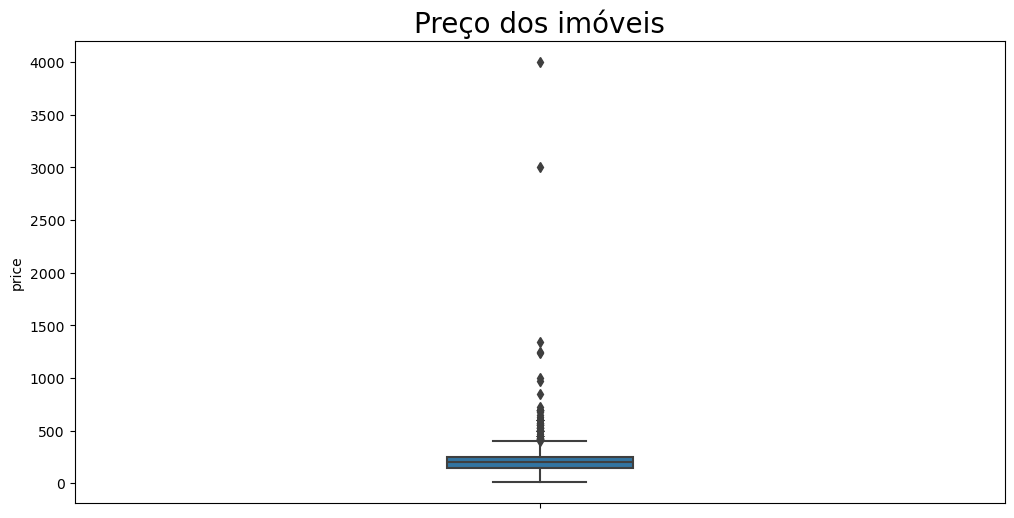

In [95]:
# Verifique e converta a coluna 'price' para uma série pandas, se necessário
if not isinstance(listings['price'], pd.Series):
    listings['price'] = pd.Series(listings['price'])

# Crie o boxplot
ax = sns.boxplot(y=listings['price'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos imóveis', fontsize=20)
plt.show()

In [96]:
listings[['host_response_rate','host_is_superhost','accommodates','bathrooms','bedrooms','price','review_scores_rating','annual_occupancy_rate']].corr().round(4)

,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,price,review_scores_rating,annual_occupancy_rate
host_response_rate,1.0000,0.1202,0.0327,0.0068,-0.0075,0.0377,0.0408,-0.0868
host_is_superhost,0.1202,1.0000,0.0778,-0.0109,0.0654,0.0395,0.1993,-0.0714
accommodates,0.0327,0.0778,1.0000,0.4484,0.7430,0.2585,-0.0287,-0.1125
bathrooms,0.0068,-0.0109,0.4484,1.0000,0.5344,0.2886,0.0029,-0.0196
bedrooms,-0.0075,0.0654,0.7430,0.5344,1.0000,0.2862,0.0360,-0.0382
price,0.0377,0.0395,0.2585,0.2886,0.2862,1.0000,0.0953,-0.0722
review_scores_rating,0.0408,0.1993,-0.0287,0.0029,0.0360,0.0953,1.0000,0.0744
annual_occupancy_rate,-0.0868,-0.0714,-0.1125,-0.0196,-0.0382,-0.0722,0.0744,1.0000


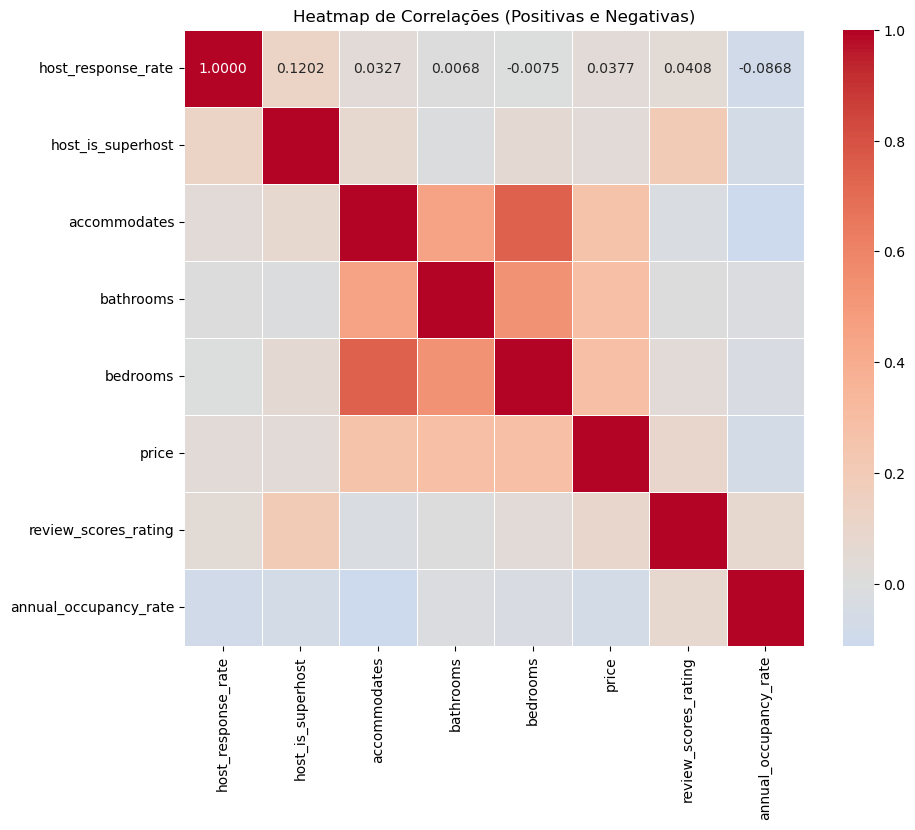

In [97]:
# Calcula a matriz de correlação
correlation_matrix = listings[['host_response_rate','host_is_superhost','accommodates','bathrooms','bedrooms','price','review_scores_rating','annual_occupancy_rate']].corr()

# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Desenha o gráfico de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5, center=0)

# Título do gráfico
plt.title('Heatmap de Correlações (Positivas e Negativas)')

# Exibe o gráfico
plt.show()

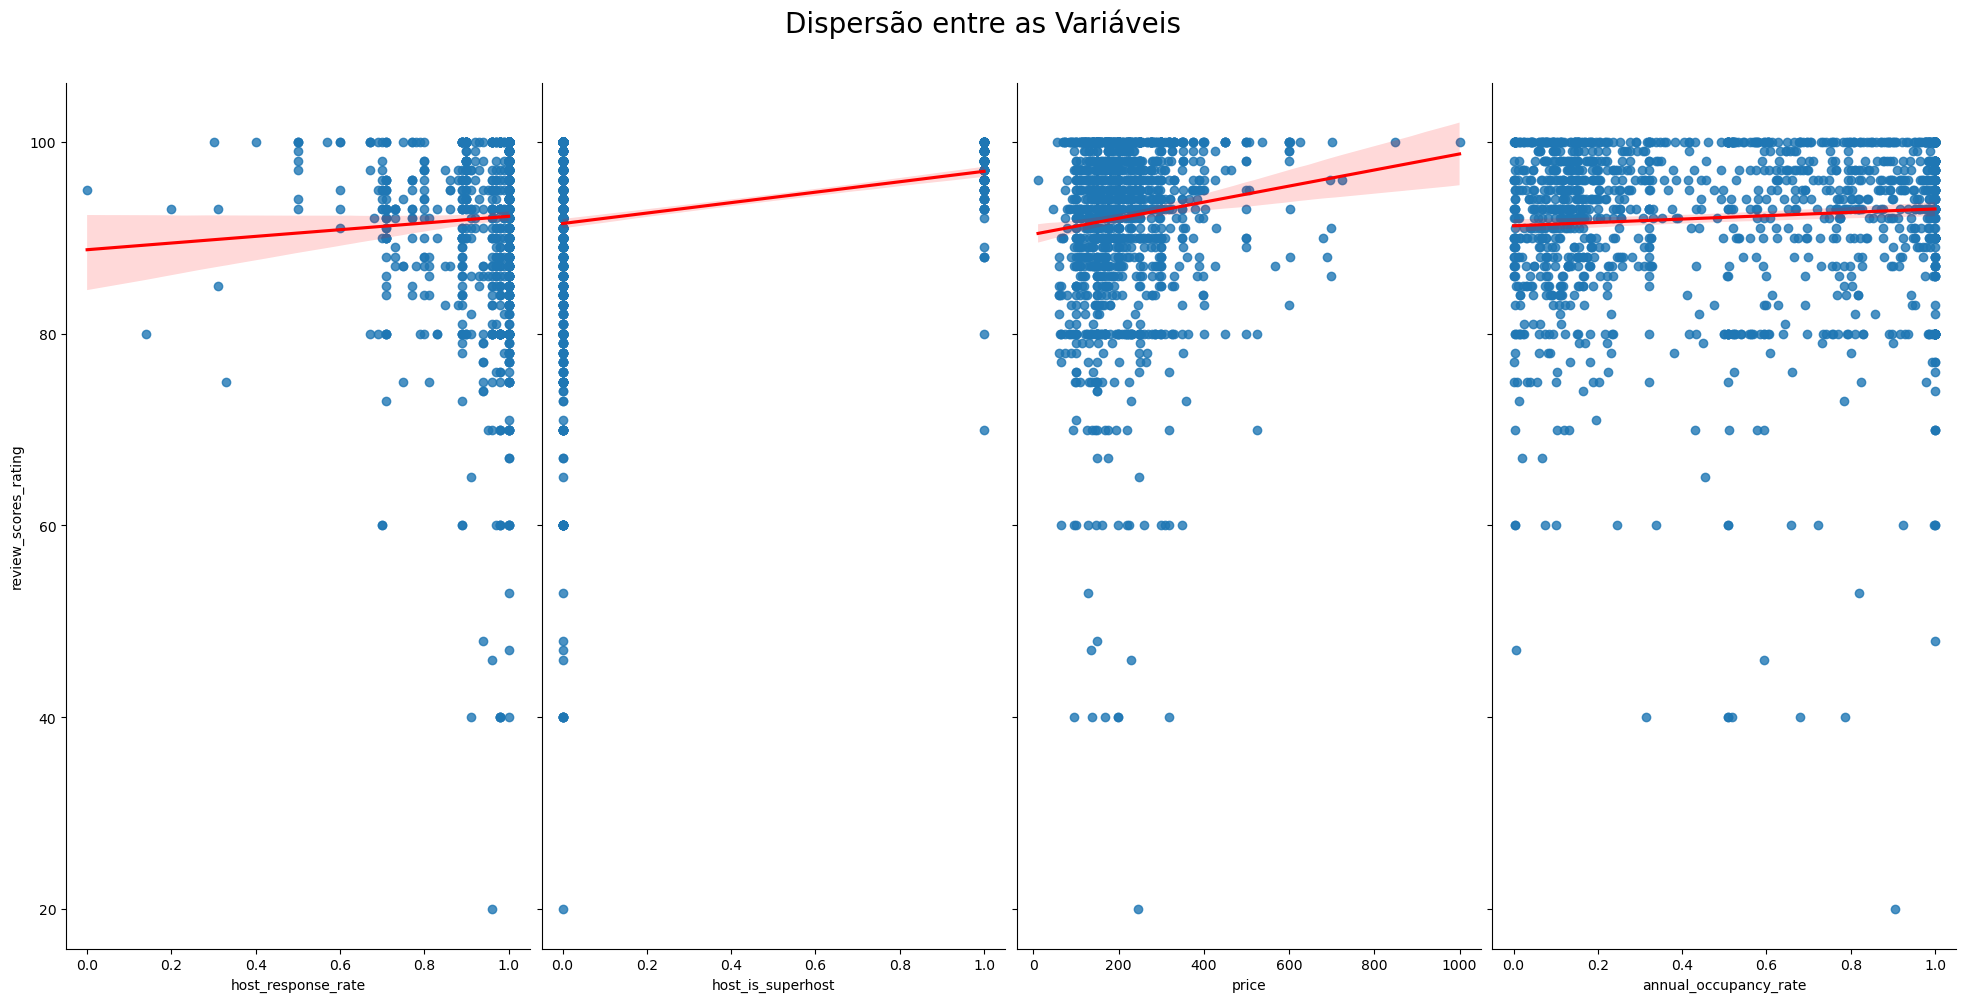

In [98]:
ax = sns.pairplot(listings, y_vars='review_scores_rating', x_vars=['host_response_rate','host_is_superhost','price','annual_occupancy_rate'], kind='reg',height=5, plot_kws={'line_kws':{'color':'red'}})
# Define o tamanho da figura
ax.fig.set_size_inches(20, 10)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

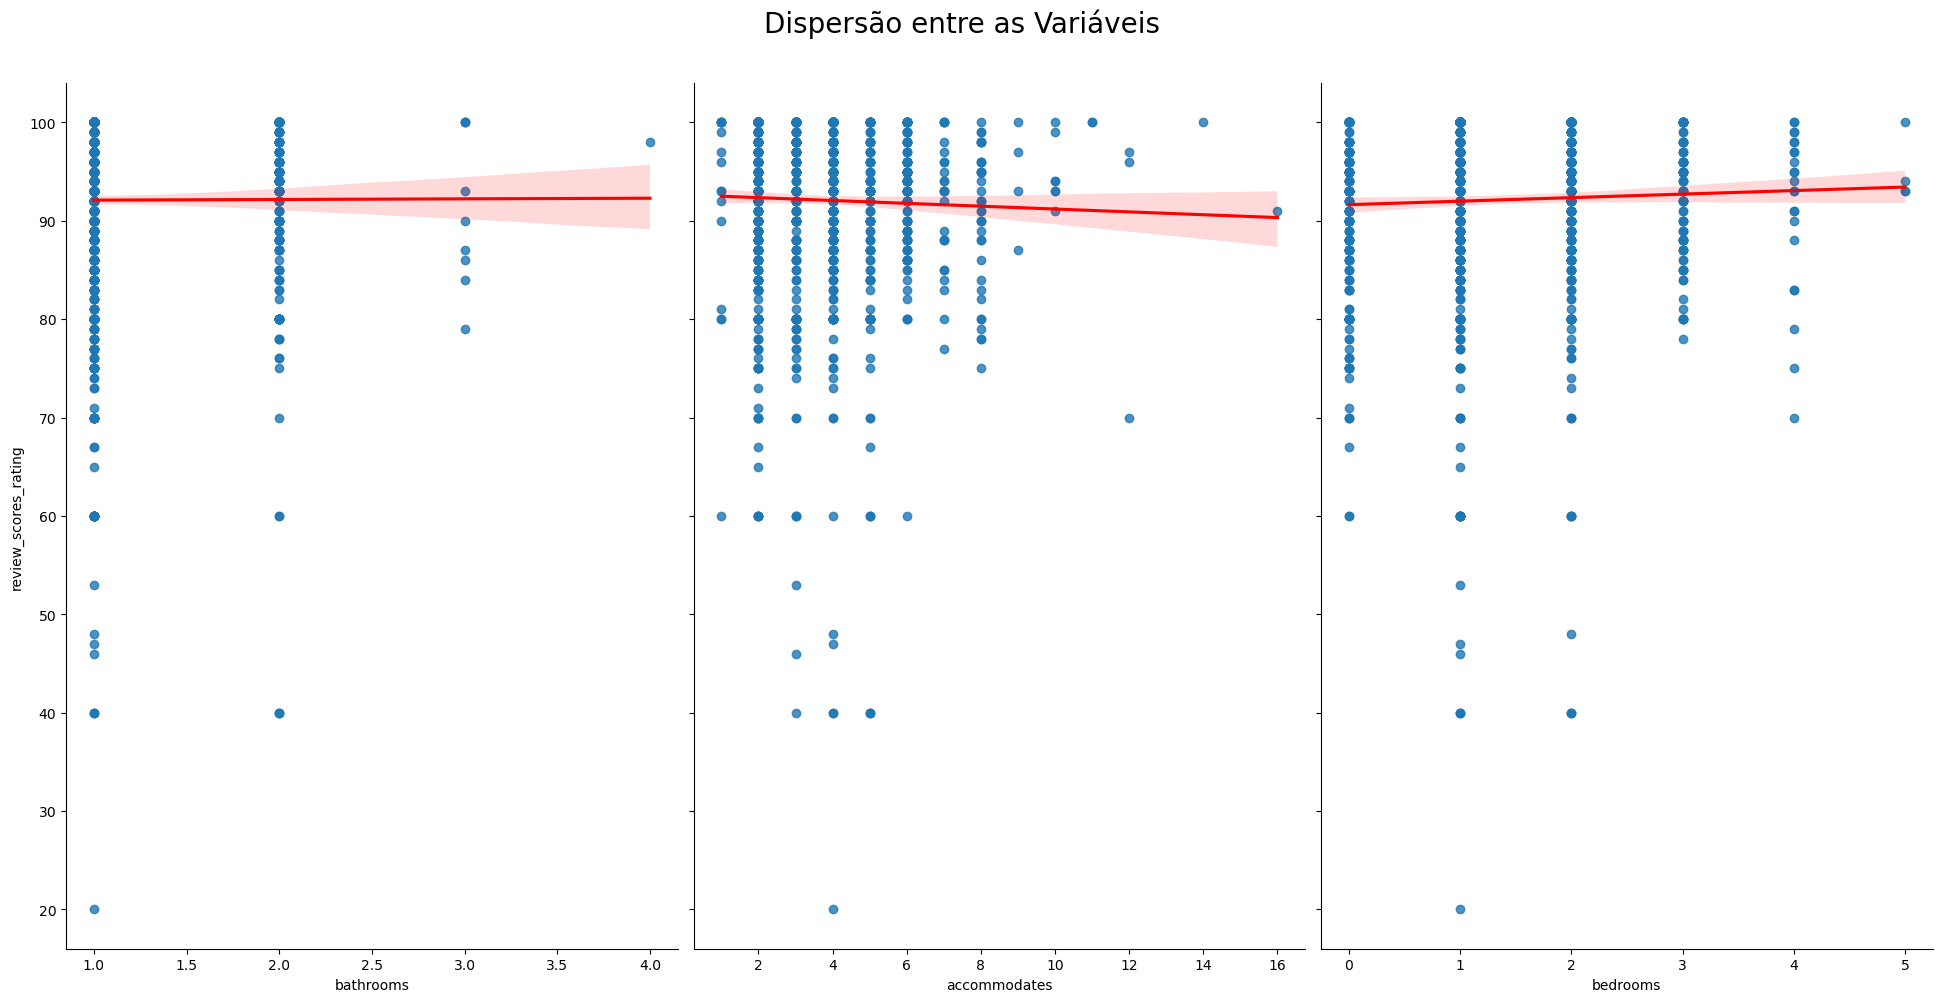

In [99]:
ax = sns.pairplot(listings, y_vars='review_scores_rating', x_vars=['bathrooms','accommodates','bedrooms'], kind='reg',height=5, plot_kws={'line_kws':{'color':'red'}})
# Define o tamanho da figura
ax.fig.set_size_inches(20, 10)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [100]:
# Calcular a mediana das reviews por host
host_median_review = listings.groupby('host_id')['review_scores_rating'].median().reset_index()
host_median_review.columns = ['host_id', 'median_review']

# Mesclar a mediana das reviews de volta ao DataFrame original
listings = listings.merge(host_median_review, on='host_id', how='left')

In [101]:
listings['number_of_reviews'].median()

5.0

In [102]:
listings['is_successful_host'] = listings.apply(
    lambda row: 1 if row['host_is_superhost'] == True and row['median_review'] >= 80 and row['annual_occupancy_rate'] >= 0.50 and row['number_of_reviews'] >= 5 else 0,
    axis=1
)

In [103]:
successful_hosts = listings.groupby('property_type')['is_successful_host'].sum()
total_hosts = listings.groupby('property_type')['host_id'].nunique()
percentage_successful_hosts = (successful_hosts / total_hosts) * 100

result_listings = pd.DataFrame({
    'successful_hosts': successful_hosts,
    'total_hosts': total_hosts,
    'percentage_successful_hosts': percentage_successful_hosts
}).reset_index()

In [104]:
result_listings

,property_type,successful_hosts,total_hosts,percentage_successful_hosts
0,Apartment,53,938,5.650320
1,Condominium,7,115,6.086957
2,House,1,76,1.315789


In [105]:
listings.groupby('guests_included')['id'].size()

guests_included
0       39
1     1215
2      338
3       76
4      139
5       21
6       25
8        2
10       1
12       1
14       1
Name: id, dtype: int64

In [106]:
# Remover registros onde 'guests_included' é 0
listings = listings[listings['guests_included'] != 0]
# Remover registros onde 'guests_included' é maior ou igual a 8
listings = listings[listings['guests_included'] < 8]

In [107]:
listings.groupby('guests_included')['id'].size()

guests_included
1    1215
2     338
3      76
4     139
5      21
6      25
Name: id, dtype: int64

In [108]:
# Remover registros onde 'guests_included' é 0
listings = listings[listings['neighbourhood_updated'] != 'Harvard Square']

In [109]:
numeric_columns = [
    'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
    'review_scores_rating', 'annual_occupancy_rate', 'reviews_per_month', 'bathrooms', 'bedrooms'
]

for col in numeric_columns:
    mean = listings[col].mean()
    median = listings[col].median()
    difference = abs(mean - median)
    print(f'{col} - Média: {mean:.2f}, Mediana: {median:.2f}, Diferença: {difference:.2f}')

price - Média: 220.05, Mediana: 199.00, Diferença: 21.05
weekly_price - Média: 1234.64, Mediana: 1080.00, Diferença: 154.64
monthly_price - Média: 5080.93, Mediana: 4650.00, Diferença: 430.93
security_deposit - Média: 355.74, Mediana: 300.00, Diferença: 55.74
cleaning_fee - Média: 84.55, Mediana: 80.00, Diferença: 4.55
review_scores_rating - Média: 92.11, Mediana: 94.00, Diferença: 1.89
annual_occupancy_rate - Média: 0.52, Mediana: 0.52, Diferença: 0.00
reviews_per_month - Média: 1.84, Mediana: 1.09, Diferença: 0.75
bathrooms - Média: 1.20, Mediana: 1.00, Diferença: 0.20
bedrooms - Média: 1.34, Mediana: 1.00, Diferença: 0.34


In [110]:
listings.to_excel('listings_cleaned.xlsx', index=False)

In [111]:
listings[listings['neighbourhood_updated'] == 'West Roxbury']

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood_updated,days_booked,annual_occupancy_rate,median_review,is_successful_host
1547,962610,https://www.airbnb.com/rooms/962610,Convenient Boston Hotel Alternative,This is a cozy yet spacious one bedroom unit w...,"Recently renovated, private one bedroom apartm...",This is a cozy yet spacious one bedroom unit w...,"This neighborhood truly has it all. Good, not...",Please note that this is a third floor apartme...,Plenty of on street parking with no restrictio...,There is a shared porch and patio available to...,I'm available for questions anytime before or ...,NO SMOKING AND PETS ANYWHERE ON THE PROPERTY 1...,4434391,https://www.airbnb.com/users/show/4434391,Damon,2012-12-18,within an hour,1.00,1.00,True,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"Centre Street, Boston, MA 02131, United States",West Roxbury,West Roxbury,Boston,02131,42.290526,-71.141056,True,Apartment,Entire home/apt,2,1,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",119.0,740.0,2550.0,150.0,25.0,2,35.0,3,1125,9,23,53,328,33,2013-08-01,2016-08-19,99.0,10.0,10.0,10.0,10.0,9.0,10.0,True,strict,False,False,0.87,West Roxbury,37,0.101370,96.5,0
1548,14303090,https://www.airbnb.com/rooms/14303090,Cozy Remodeled Compact Apartment,The apartment is located on the lower level of...,NaN,The apartment is located on the lower level of...,NaN,NaN,NaN,NaN,NaN,"No smoking, keep clean and respect property",8015347,https://www.airbnb.com/users/show/8015347,Edwin,2013-08-07,within an hour,1.00,0.95,False,3,"['email', 'phone', 'reviews', 'kba']",True,True,"Johnson Street, Boston, MA 02132, United States",NaN,West Roxbury,Boston,02132,42.272320,-71.162498,False,House,Entire home/apt,4,1,2,2,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",155.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,0,0,25,300,3,2016-08-07,2016-08-23,100.0,9.0,10.0,10.0,10.0,10.0,10.0,True,moderate,False,False,2.81,West Roxbury,65,0.178082,100.0,0
1549,601763,https://www.airbnb.com/rooms/601763,The Alameda 2 | 2BR 1BA | 2nd Floor,Our comfy two bedroom apartment with tons of l...,West Roxbury – Friendly Neighborhood – Commute...,Our comfy two bedroom apartment with tons of l...,NaN,NaN,NaN,NaN,NaN,NaN,71783,https://www.airbnb.com/users/show/71783,Lance,2010-01-19,within a day,0.73,0.91,False,10,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"Alameda Rd, Boston, MA 02132, United States",West Roxbury,West Roxbury,Boston,02132,42.291181,-71.153162,True,Apartment,Entire home/apt,5,1,2,2,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",125.0,800.0,3200.0,500.0,175.0,2,10.0,2,365,5,10,40,300,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,strict,False,False,NaN,West Roxbury,65,0.178082,93.0,0
1550,10185866,https://www.airbnb.com/rooms/10185866,Beautiful large 2 BR for three week,Fully furnished apartment is available for sho...,NaN,Fully furnished apartment is available for sho...,NaN,NaN,NaN,NaN,NaN,NaN,52311253,https://www.airbnb.com/users/show/52311253,Amita

In [112]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1813 entries, 0 to 1857
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1813 non-null   int64         
 1   listing_url                       1813 non-null   object        
 2   name                              1813 non-null   object        
 3   summary                           1737 non-null   object        
 4   space                             1337 non-null   object        
 5   description                       1813 non-null   object        
 6   neighborhood_overview             1147 non-null   object        
 7   notes                             820 non-null    object        
 8   transit                           1187 non-null   object        
 9   access                            986 non-null    object        
 10  interaction                       983 non-null    obj

In [113]:
listings[listings['bathrooms'] == 0].count()

id                       0
listing_url              0
name                     0
summary                  0
space                    0
                        ..
neighbourhood_updated    0
days_booked              0
annual_occupancy_rate    0
median_review            0
is_successful_host       0
Length: 73, dtype: int64

In [114]:
listings[listings['guests_included'] == 1]['price'].median()


199.0

In [115]:
listings['guests_included'].median()

1.0

In [116]:
listings['annual_occupancy_rate'].mean()

0.5192256836092453

In [117]:
listings['number_of_reviews'].median()

5.0

In [118]:
listings['number_of_reviews'].sum()

30500

In [119]:
listings['review_scores_rating'].median()

94.0

In [120]:
listings['number_of_reviews'].count()

1813

In [121]:
listings

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,neighbourhood_updated,days_booked,annual_occupancy_rate,median_review,is_successful_host
0,5706985,https://www.airbnb.com/rooms/5706985,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,Roslindale is the new hip area of Boston. Clos...,"Information about the house, wifi pasword and ...",The commuter rail (Needham Line) is a 5 minute...,I have an electronic keypad so arrival time ca...,I can interact or not- that is up to you. This...,Please no shoes in the house so bring slippers...,6570877,https://www.airbnb.com/users/show/6570877,Juliet,2013-05-25,within an hour,0.98,0.96,False,5,"['email', 'phone', 'reviews', 'jumio', 'kba']",True,True,"Kittredge Street, Boston, MA 02131, United States",NaN,Roslindale,Boston,02131,42.281390,-71.131190,False,Apartment,Entire home/apt,3,1,1,2,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",100.0,NaN,NaN,NaN,NaN,1,25.0,1,1125,22,39,69,344,57,2015-07-08,2016-09-01,90.0,10.0,10.0,10.0,10.0,9.0,9.0,False,strict,False,False,4.00,Roslindale,21,0.057534,90.5,0
1,849408,https://www.airbnb.com/rooms/849408,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,"This neighborhood truly has it all. Good, not...",Please note that this is a second floor apartm...,Plenty of on street parking with no restrictio...,NaN,I'm available for questions anytime before or ...,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,4434391,https://www.airbnb.com/users/show/4434391,Damon,2012-12-18,within an hour,1.00,1.00,True,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,42.288820,-71.139510,True,Apartment,Entire home/apt,5,1,2,2,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",229.0,NaN,NaN,200.0,50.0,4,25.0,4,10,20,50,80,107,33,2014-01-02,2016-05-27,94.0,10.0,9.0,10.0,10.0,9.0,9.0,False,strict,False,False,1.01,Roslindale,258,0.706849,96.5,1
2,2684840,https://www.airbnb.com/rooms/2684840,"Updated, spacious living in Rozzie","Clean, sunny 2 bedroom in amazing Roslindale V...",NaN,"Clean, sunny 2 bedroom in amazing Roslindale V...",NaN,NaN,NaN,NaN,NaN,- One of the bedroom closets is not accessible...,13743098,https://www.airbnb.com/users/show/13743098,Megan,2014-03-31,within a few hours,1.00,1.00,False,2,"['email', 'phone', 'reviews']",True,False,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,42.291723,-71.131556,True,Condominium,Entire home/apt,4,1,2,2,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air Condition...",93.0,NaN,NaN,NaN,40.0,1,0.0,1,1125,0,0,0,0,1,2016-07-23,2016-07-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,flexible,False,False,0.64,Roslindale,365,1.000000,100.0,0
3,13547301,https://www.airbnb.com/r

In [122]:
# Filtrando os registros de calendar que têm listing_id no listings
filtered_calendar = calendar[calendar['listing_id'].isin(listings['id'])]

# Fazendo a junção dos DataFrames com base nas colunas 'listing_id' e 'id'
merged_df = pd.merge(filtered_calendar[['listing_id', 'available']], listings[['id', 'property_type']], left_on='listing_id', right_on='id')

# Filtrando registros onde 'available' é True
available_listings = merged_df[merged_df['available'] == False]

# Agrupando por 'property_type' e contando 'listing_id' distintos
result = available_listings.groupby('property_type')['listing_id'].nunique().reset_index()

# Renomeando a coluna para melhor entendimento
result.columns = ['property_type', 'distinct_listing_count']

print(result)

  property_type  distinct_listing_count
0     Apartment                    1567
1   Condominium                     132
2         House                      79


In [123]:
listings.groupby(['neighbourhood_updated', 'property_type'])['annual_occupancy_rate'].mean().reset_index().round(2) * 100

,neighbourhood_updated,property_type,annual_occupancy_rate
0,Allston-BrightonAllston-BrightonAllston-Bright...,ApartmentApartmentApartmentApartmentApartmentA...,64.0
1,Allston-BrightonAllston-BrightonAllston-Bright...,CondominiumCondominiumCondominiumCondominiumCo...,60.0
2,Allston-BrightonAllston-BrightonAllston-Bright...,HouseHouseHouseHouseHouseHouseHouseHouseHouseH...,39.0
3,Back BayBack BayBack BayBack BayBack BayBack B...,ApartmentApartmentApartmentApartmentApartmentA...,44.0
4,Back BayBack BayBack BayBack BayBack BayBack B...,CondominiumCondominiumCondominiumCondominiumCo...,55.0
5,Back BayBack BayBack BayBack BayBack BayBack B...,HouseHouseHouseHouseHouseHouseHouseHouseHouseH...,35.0
6,Beacon HillBeacon HillBeacon HillBeacon HillBe...,ApartmentApartmentApartmentApartmentApartmentA...,59.0
7,Beacon HillBeacon HillBeacon HillBeacon HillBe...,CondominiumCondominiumCondominiumCondominiumCo...,56.0
8,Beacon HillBeacon HillBeacon HillBeacon HillBe...,HouseHouseHouseHouseHouseHouseHouseHouseHouseH...,50.0
9,CharlestownCharlestownCharlestownCharlestownCh...,ApartmentApartmentApartmentApartmentApartmentA...,54.0


In [124]:
listings.groupby('neighbourhood_updated').size().reset_index(name='count').sort_values(by='count',ascending = False)

,neighbourhood_updated,count
1,Back Bay,243
21,South End,212
9,Fenway/Kenmore,195
20,South Boston,145
0,Allston-Brighton,145
17,North End,133
2,Beacon Hill,124
13,Jamaica Plain,120
4,Chinatown,69
23,West End,60
